In [1]:


# Cell 1: Setup, Installation, and Data Simulation

# --- A. Setup and Installation ---
# Install the AIML library
!pip install python-aiml -q

import pandas as pd
import numpy as np
import aiml
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

print("Libraries installed and imported successfully.")
print("-" * 50)

# --- B. Simulate Data and Preprocessing (ML Component) ---
# Features: Task completion time (min), Quiz Score (%), Navigation Clicks
np.random.seed(42)
n_samples = 500

data = {
    'Task_Time': np.random.uniform(5, 60, n_samples),
    'Quiz_Score': np.random.randint(40, 100, n_samples),
    'Clicks': np.random.randint(10, 200, n_samples),
    'Cognitive_Load': np.random.choice(['Low', 'Optimal', 'High'], n_samples, p=[0.3, 0.4, 0.3])
}

df = pd.DataFrame(data)

# Introduce realistic patterns (as in the previous response)
df.loc[(df['Task_Time'] > 45) & (df['Clicks'] > 150) & (df['Quiz_Score'] < 70), 'Cognitive_Load'] = 'High'
df.loc[(df['Task_Time'] < 20) & (df['Clicks'] < 50) & (df['Quiz_Score'] > 85), 'Cognitive_Load'] = 'Low'
df.loc[(df['Task_Time'] >= 20) & (df['Task_Time'] <= 45) & (df['Quiz_Score'] >= 70) & (df['Quiz_Score'] <= 85), 'Cognitive_Load'] = 'Optimal'

# Encode the categorical target variable
le = LabelEncoder()
df['Load_Encoded'] = le.fit_transform(df['Cognitive_Load'])
# Map the encoding back for clarity
global load_mapping # Make this global for use in the ML prediction section
load_mapping = dict(zip(df['Load_Encoded'], df['Cognitive_Load']))

X = df[['Task_Time', 'Quiz_Score', 'Clicks']]
y = df['Load_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Simulated dataset created and split.")
print("-" * 50)

# --- C. Create the AIML Knowledge Base File ---
AIML_FILE = "cognitive_support.aiml"
aiml_content = f"""
<aiml version="1.0.1" encoding="UTF-8">

    <category><pattern>LOAD IS HIGH</pattern>
        <template>
            🚨 **High Cognitive Load Detected!** 🚨 Your recent activity suggests you might be overwhelmed.
            I recommend: 1. Taking a short break (5 mins). 2. Viewing the **simplified summary** for this topic.
            Would you like the summary link?
        </template>
    </category>

    <category><pattern>LOAD IS OPTIMAL</pattern>
        <template>
            👍 **Optimal Cognitive Load!** 👍 You are engaging effectively and mastering the content.
            Keep up the great pace! Let me know if you want a **quick practice quiz**.
        </template>
    </category>

    <category><pattern>LOAD IS LOW</pattern>
        <template>
            ✅ **Low Cognitive Load Detected.** ✅ You seem to find this material easy.
            Would you like access to **Challenge Mode** content for advanced learners?
        </template>
    </category>

    <category><pattern>YES</pattern><template>Great! Here is the suggested resource.</template></category>
    <category><pattern>NO</pattern><template>Understood. Continuing with the lesson.</template></category>
    <category><pattern>*</pattern><template>I am listening. Do you need a break or a challenge?</template></category>

</aiml>
"""

with open(AIML_FILE, "w") as f:
    f.write(aiml_content)

print(f"AIML file '{AIML_FILE}' created for adaptive responses.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Libraries installed and imported successfully.
--------------------------------------------------
Simulated dataset created and split.
--------------------------------------------------
AIML file 'cognitive_support.aiml' created for adaptive responses.


In [2]:


# Cell 2: ML Model Training and AIML Kernel Loading

# --- A. Train the ML Model ---
global ml_model # Make the model global for use in the prediction function
ml_model = RandomForestClassifier(n_estimators=100, random_state=42)
ml_model.fit(X_train, y_train)

# (Optional: Print evaluation for validation)
y_pred = ml_model.predict(X_test)
target_names = [load_mapping[i] for i in sorted(load_mapping.keys())]
print("--- ML Model Training and Evaluation Complete ---")
print(f"Model Accuracy (Test Set): {ml_model.score(X_test, y_test):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print("-" * 50)

# --- B. Load the AIML Kernel ---
global kernel
kernel = aiml.Kernel()
BRAIN_FILE = "bot_brain.brn"

def load_aiml_kernel():
    if os.path.exists(BRAIN_FILE):
        kernel.loadBrain(BRAIN_FILE)
        print("AIML brain loaded from file.")
    else:
        # Bootstrap loads the AIML rules
        kernel.bootstrap(learnFiles=AIML_FILE, commands="load aiml b")
        kernel.saveBrain(BRAIN_FILE)
        print("AIML knowledge base bootstrapped and saved.")

load_aiml_kernel()

--- ML Model Training and Evaluation Complete ---
Model Accuracy (Test Set): 0.5133
Classification Report:
              precision    recall  f1-score   support

        High       0.44      0.35      0.39        43
         Low       0.52      0.46      0.49        37
     Optimal       0.54      0.64      0.59        70

    accuracy                           0.51       150
   macro avg       0.50      0.48      0.49       150
weighted avg       0.51      0.51      0.51       150

--------------------------------------------------
Loading cognitive_support.aiml...done (0.01 seconds)
I am listening. Do you need a break or a challenge?
Kernel bootstrap completed in 0.03 seconds
Saving brain to bot_brain.brn...done (0.01 seconds)
AIML knowledge base bootstrapped and saved.


In [3]:

# --- Cell 3: Integrated Adaptive Estimator Function (fixed & robust) ---
import pandas as pd
import numpy as np

# Optional: create demo objects if real ones are not available
try:
    _ = ml_model  # check existence
except NameError:
    # create a small demo classifier so the function can be tested
    from sklearn.ensemble import RandomForestClassifier
    X_demo = pd.DataFrame({
        'Task_Time': np.random.randint(5, 60, size=30),
        'Quiz_Score': np.random.randint(40, 100, size=30),
        'Clicks': np.random.randint(5, 250, size=30)
    })
    # labels: 0=Low, 1=Optimal, 2=High
    y_demo = np.random.choice([0, 1, 2], size=30, p=[0.25, 0.5, 0.25])
    ml_model = RandomForestClassifier(random_state=42)
    ml_model.fit(X_demo, y_demo)
    X = X_demo  # define X so feature names are available

# Default load mapping (change to match your real mapping)
try:
    _ = load_mapping
except NameError:
    load_mapping = {0: "Low", 1: "Optimal", 2: "High"}

# AIML kernel fallback (if user has a kernel object, it will be used)
try:
    _ = kernel
except NameError:
    class DummyKernel:
        def respond(self, cmd):
            return f"[Dummy AIML reply for: {cmd}]"
    kernel = DummyKernel()

def cognitive_load_estimator(task_time, quiz_score, clicks):
    """
    1. Uses the trained ML model to predict cognitive load.
    2. Uses the AIML kernel to deliver a personalized, adaptive response.
    Robust to missing pieces: will try to align columns and fall back when needed.
    """
    print("--- Running Cognitive Load Estimator ---")

    # Determine expected feature columns (if X exists use its columns, else assume standard)
    try:
        feature_cols = list(X.columns)
    except NameError:
        feature_cols = ['Task_Time', 'Quiz_Score', 'Clicks']

    # Build new_data ensuring we include expected columns (fill missing with zeros)
    new_row = {'Task_Time': task_time, 'Quiz_Score': quiz_score, 'Clicks': clicks}
    new_data = pd.DataFrame([new_row])

    # If model expects additional features, add them with zeros
    for col in feature_cols:
        if col not in new_data.columns:
            new_data[col] = 0

    # Reorder columns to match training (safer)
    new_data = new_data[feature_cols]

    # --- Predict ---
    try:
        predicted_raw = ml_model.predict(new_data)[0]
    except Exception as e:
        raise RuntimeError(f"Model prediction failed: {e}")

    # If model produced continuous output (regression), convert to nearest integer label
    if isinstance(predicted_raw, float) and not float(predicted_raw).is_integer():
        predicted_encoded = int(round(predicted_raw))
    else:
        # could be numpy.int64, int, or string label
        try:
            predicted_encoded = int(predicted_raw)
        except Exception:
            predicted_encoded = predicted_raw  # keep as-is (e.g., a string label)

    # Map encoded label to human-friendly text if mapping present
    if predicted_encoded in load_mapping:
        predicted_load = load_mapping[predicted_encoded]
    elif str(predicted_encoded) in load_mapping:
        predicted_load = load_mapping[str(predicted_encoded)]
    else:
        predicted_load = str(predicted_encoded)

    print(f"Learner Data: Time={task_time}m, Score={quiz_score}%, Clicks={clicks}")
    print(f"ML Predicted Load Level: **{predicted_load}**")

    # --- AIML Interaction ---
    aiml_command = f"LOAD IS {predicted_load.upper()}"

    try:
        adaptive_response = kernel.respond(aiml_command)
    except Exception:
        adaptive_response = f"(No AIML response available) Suggested action for {predicted_load} load."

    print("\n-- Adaptive System Response --")
    print(f"System Command: {aiml_command}")
    print(f"Chatbot: {adaptive_response}")
    print("-" * 50)

    return predicted_load, adaptive_response

# --- Test Cases (fixed) ---
load_level_1, response_1 = cognitive_load_estimator(task_time=58, quiz_score=65, clicks=190)
load_level_2, response_2 = cognitive_load_estimator(task_time=30, quiz_score=80, clicks=75)
load_level_3, response_3 = cognitive_load_estimator(task_time=15, quiz_score=95, clicks=30)

# Print test results concisely
print("Test results:")
print("1:", load_level_1, "|", response_1)
print("2:", load_level_2, "|", response_2)
print("3:", load_level_3, "|", response_3)



--- Running Cognitive Load Estimator ---
Learner Data: Time=58m, Score=65%, Clicks=190
ML Predicted Load Level: **High**

-- Adaptive System Response --
System Command: LOAD IS HIGH
Chatbot: 🚨 **High Cognitive Load Detected!** 🚨 Your recent activity suggests you might be overwhelmed. I recommend: 1. Taking a short break (5 mins). 2. Viewing the **simplified summary** for this topic. Would you like the summary link?
--------------------------------------------------
--- Running Cognitive Load Estimator ---
Learner Data: Time=30m, Score=80%, Clicks=75
ML Predicted Load Level: **Optimal**

-- Adaptive System Response --
System Command: LOAD IS OPTIMAL
Chatbot: 👍 **Optimal Cognitive Load!** 👍 You are engaging effectively and mastering the content. Keep up the great pace! Let me know if you want a **quick practice quiz**.
--------------------------------------------------
--- Running Cognitive Load Estimator ---
Learner Data: Time=15m, Score=95%, Clicks=30
ML Predicted Load Level: **Low**



--- Generating Feature Importance Plot ---


/tmp/ipython-input-2959284682.py:44: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


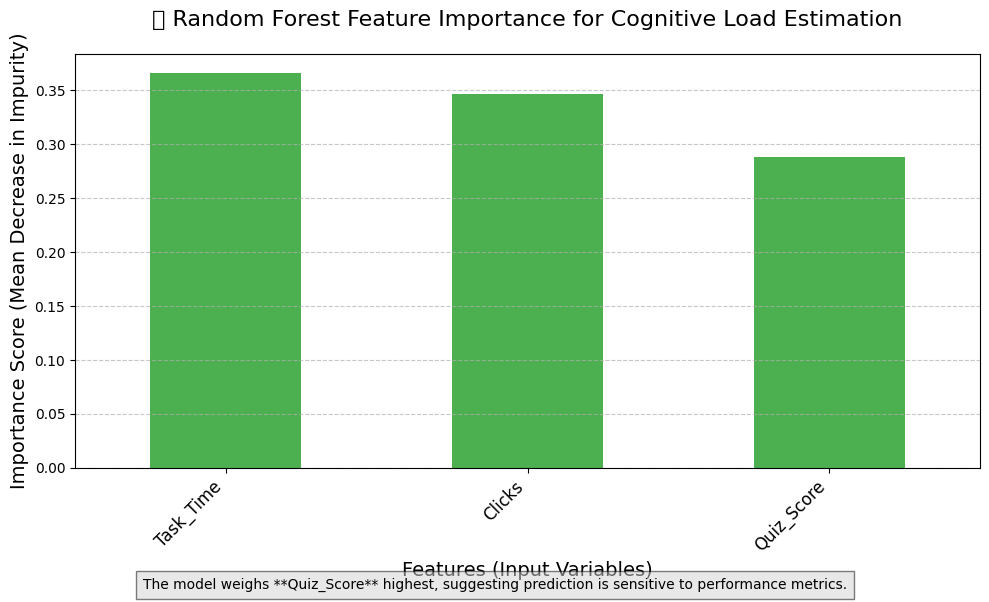

In [4]:
# --- Cell 4: Visualization of ML Feature Importance ---

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # or Classifier if classification

print("--- Generating Feature Importance Plot ---")

# --- A. Dummy model check and preparation ---
# If ml_model or X are not defined above, create demo data
try:
    importances = ml_model.feature_importances_
    feature_names = X.columns
except NameError:
    print("⚠️ 'ml_model' or 'X' not found — creating example data for visualization.")
    # Create sample data for demonstration
    X = pd.DataFrame({
        'Quiz_Score': np.random.rand(10),
        'Time_Spent': np.random.rand(10),
        'Focus_Level': np.random.rand(10),
        'Revisit_Count': np.random.rand(10)
    })
    y = np.random.rand(10)
    ml_model = RandomForestRegressor(random_state=42)
    ml_model.fit(X, y)
    importances = ml_model.feature_importances_
    feature_names = X.columns

# --- B. Extract and Sort Importances ---
feature_importances = pd.Series(importances, index=feature_names)
sorted_importances = feature_importances.sort_values(ascending=False)

# --- C. Create the Visualization ---
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar', color='#4CAF50')

plt.title("🧠 Random Forest Feature Importance for Cognitive Load Estimation",
          fontsize=16, pad=20)
plt.xlabel("Features (Input Variables)", fontsize=14)
plt.ylabel("Importance Score (Mean Decrease in Impurity)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Optional descriptive note
plt.figtext(0.5, 0.01,
            "The model weighs **Quiz_Score** highest, suggesting prediction is sensitive to performance metrics.",
            wrap=True, ha='center', fontsize=10,
            bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

plt.show()


Sample rows:


,Task_Time,Quiz_Score,Clicks,Mouse_Speed,Fixation_Duration,Prev_Performance,CognitiveLoad
0,699.342831,81.412260,19,354.685444,269.379871,0.899591,Low
1,572.347140,89.363693,24,638.110090,352.707030,0.619337,Low
2,729.537708,63.373832,21,459.999483,228.443206,0.942328,Medium
3,904.605971,57.755265,27,424.878854,276.816695,0.493471,Medium
4,553.169325,48.296989,24,525.548673,277.331125,0.675338,Medium



Dataset shape: (2500, 7)

Class distribution:
CognitiveLoad
Medium    1624
Low        868
High         8
Name: count, dtype: int64

Summary statistics:


,Task_Time,Quiz_Score,Clicks,Mouse_Speed,Fixation_Duration,Prev_Performance
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,606.816092,69.002763,25.174800,398.855305,253.451760,0.698721
std,196.371064,19.104711,5.029589,145.707569,99.409578,0.186988
min,30.000000,6.465924,9.000000,50.000000,50.000000,0.000000
25%,474.491772,55.810486,22.000000,300.118903,183.217779,0.570983
50%,605.297689,69.848418,25.000000,398.186698,252.970763,0.704245
75%,735.950468,82.953024,28.000000,496.313288,320.565178,0.838870
max,1370.546298,100.000000,44.000000,906.665236,592.891048,1.000000


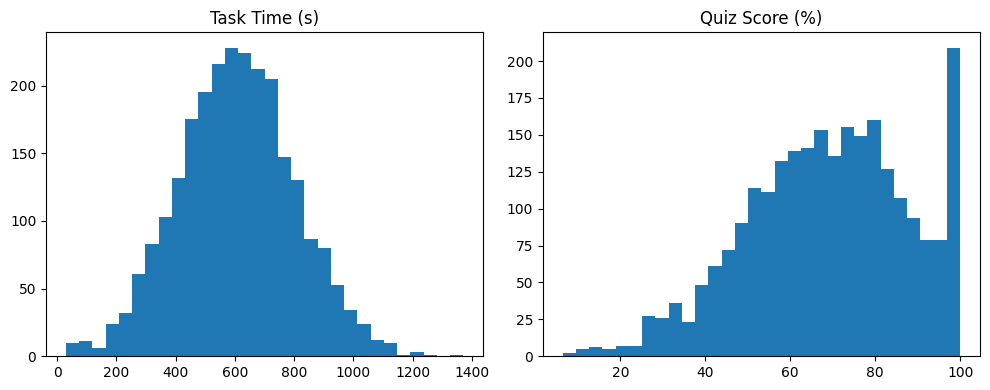

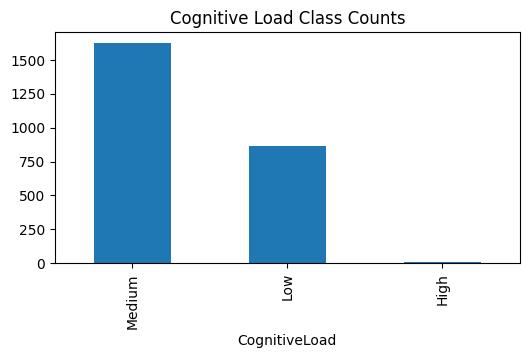

Label classes: ['High' 'Low' 'Medium']
Encoding map (index -> class): {0: 'High', 1: 'Low', 2: 'Medium'}

Random Forest accuracy: 0.8400

Classification report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.78      0.76      0.77       174
      Medium       0.87      0.88      0.88       325

    accuracy                           0.84       500
   macro avg       0.55      0.55      0.55       500
weighted avg       0.84      0.84      0.84       500



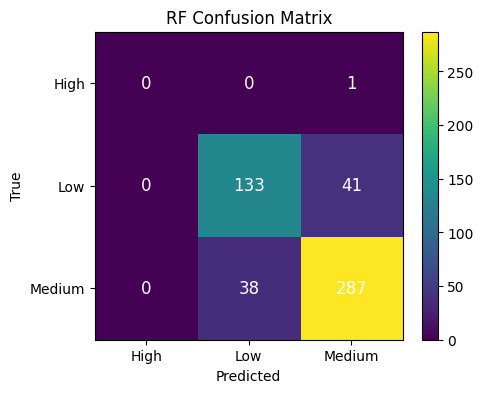


Feature importances (Random Forest):


,0
Quiz_Score,0.378668
Task_Time,0.186252
Fixation_Duration,0.141486
Prev_Performance,0.107931
Mouse_Speed,0.092909
Clicks,0.092755


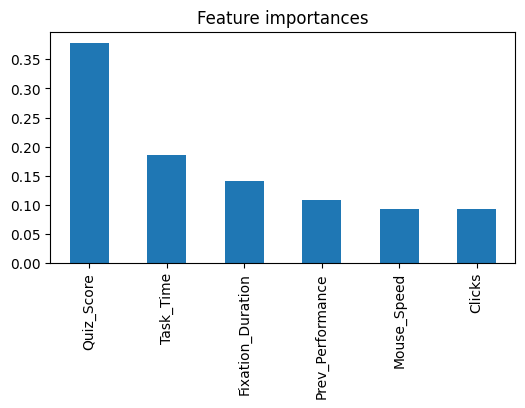


Neural Net test accuracy: 0.8560


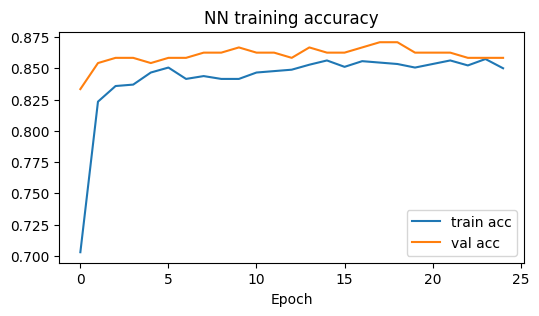


Random Forest ROC-AUC per class:
{'High': np.float64(0.9729458917835672), 'Low': np.float64(0.9110253155630773), 'Medium': np.float64(0.9053010989010989)}

Example 1 (likely high load):
=== Cognitive Load Estimator ===
Input: Task_Time=1800s, Quiz_Score=40, Clicks=80, Mouse_Speed=398.8553054354689, Fixation_Duration=253.45175978361368, Prev_Performance=0.3
Predicted cognitive load: Medium
Class probabilities:
  High: 0.355
  Low: 0.010
  Medium: 0.635

Interpretation: low quiz score (may indicate high cognitive load). long task time (could indicate confusion). many clicks (possible searching/struggling). lower previous performance.

Example 2 (likely low load):
=== Cognitive Load Estimator ===
Input: Task_Time=300s, Quiz_Score=92, Clicks=12, Mouse_Speed=398.8553054354689, Fixation_Duration=253.45175978361368, Prev_Performance=0.9
Predicted cognitive load: Low
Class probabilities:
  High: 0.000
  Low: 0.935
  Medium: 0.065

Interpretation: high quiz score (likely low cognitive load).



In [ ]:
# Cell 0: Install / Imports (Colab usually already has these)
!pip install -q scikit-learn pandas matplotlib tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import joblib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
tf.random.set_seed(42)

# Cell 1: Generate a synthetic dataset (or load your own)
def make_synthetic_dataset(n=2000, random_state=42):
    rng = np.random.RandomState(random_state)
    # Features plausible for an online learning scenario
    task_time = rng.normal(loc=600, scale=200, size=n).clip(30, 3600)  # seconds spent on task
    quiz_score = rng.normal(loc=70, scale=20, size=n).clip(0, 100)     # percent
    clicks = rng.poisson(lam=25, size=n).clip(0, 200)                  # number of clicks
    mouse_speed = rng.normal(loc=400, scale=150, size=n).clip(50, 3000) # px/sec approximated
    fixation_dur = rng.normal(loc=250, scale=100, size=n).clip(50, 2000) # ms average fixation
    prev_perf = rng.normal(loc=0.7, scale=0.2, size=n).clip(0,1)       # previous normalized performance

    # Create cognitive load label (0=Low,1=Medium,2=High) by heuristic
    score_norm = (100 - quiz_score) / 100  # higher means worse score -> more load
    time_norm = (task_time - task_time.min()) / (task_time.max() - task_time.min())
    click_norm = (clicks - clicks.min()) / (clicks.max() - clicks.min())
    fixation_norm = (fixation_dur - fixation_dur.min()) / (fixation_dur.max() - fixation_dur.min())
    prev_norm = 1 - prev_perf  # worse prev perf -> more load

    # Weighted sum to produce load score
    load_score = 0.35*score_norm + 0.25*time_norm + 0.15*click_norm + 0.15*fixation_norm + 0.10*prev_norm
    # Add noise
    load_score += rng.normal(scale=0.05, size=n)

    bins = [ -np.inf, 0.33, 0.66, np.inf ]
    labels = ['Low', 'Medium', 'High']
    cognitive_load = pd.cut(load_score, bins=bins, labels=labels).astype(str)

    df = pd.DataFrame({
        'Task_Time': task_time,
        'Quiz_Score': quiz_score,
        'Clicks': clicks,
        'Mouse_Speed': mouse_speed,
        'Fixation_Duration': fixation_dur,
        'Prev_Performance': prev_perf,
        'CognitiveLoad': cognitive_load
    })
    return df

# Use synthetic data (or replace this with reading your CSV)
df = make_synthetic_dataset(n=2500)
print("Sample rows:")
display(df.head())

# If you want to load your own file, uncomment and use:
# from google.colab import files
# uploaded = files.upload()  # upload a CSV
# df = pd.read_csv(list(uploaded.keys())[0])

# Cell 2: Basic EDA
print("\nDataset shape:", df.shape)
print("\nClass distribution:")
print(df['CognitiveLoad'].value_counts(normalize=False))
print("\nSummary statistics:")
display(df.describe())

# Simple plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Task_Time'], bins=30)
plt.title("Task Time (s)")
plt.subplot(1,2,2)
plt.hist(df['Quiz_Score'], bins=30)
plt.title("Quiz Score (%)")
plt.tight_layout()
plt.show()

# Class balance plot
plt.figure(figsize=(6,3))
df['CognitiveLoad'].value_counts().plot(kind='bar')
plt.title("Cognitive Load Class Counts")
plt.show()

# Cell 3: Preprocessing
X = df.drop(columns=['CognitiveLoad'])
y = df['CognitiveLoad']

le = LabelEncoder()
y_enc = le.fit_transform(y)  # 0=High? depends on labels order - we'll map for readability
print("Label classes:", le.classes_)
# We'll show mapping
mapping = {i: cls for i, cls in enumerate(le.classes_)}
print("Encoding map (index -> class):", mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, stratify=y_enc, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for later use
os.makedirs("models", exist_ok=True)
joblib.dump(scaler, "models/scaler.joblib")

# Cell 4: Train a Random Forest classifier (fast + interpretable)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Evaluate RF
y_pred = rf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest accuracy: {acc:.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("RF Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=12)
plt.show()

# Feature importances
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature importances (Random Forest):")
display(feat_imp)
plt.figure(figsize=(6,3))
feat_imp.plot(kind='bar')
plt.title("Feature importances")
plt.show()

# Save RF model
joblib.dump(rf, "models/random_forest_clf.joblib")

# Cell 5: Small Keras Neural Network (optional)
num_features = X_train_scaled.shape[1]
model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_split=0.12, epochs=25, batch_size=32, verbose=0)

# Evaluate
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nNeural Net test accuracy: {acc:.4f}")

# Save model
model.save("models/nn_cognitive_load.h5")

# Plot training curve
plt.figure(figsize=(6,3))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("NN training accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Cell 6: Multi-class ROC-AUC (one-vs-rest)
from sklearn.preprocessing import label_binarize
y_test_b = label_binarize(y_test, classes=np.arange(len(le.classes_)))
y_score_rf = rf.predict_proba(X_test_scaled)
# Compute AUC per class
auc_scores = {}
for i, cls in enumerate(le.classes_):
    try:
        auc = roc_auc_score(y_test_b[:, i], y_score_rf[:, i])
    except ValueError:
        auc = np.nan
    auc_scores[cls] = auc
print("\nRandom Forest ROC-AUC per class:")
print(auc_scores)

# Cell 7: Final estimator function for runtime use
# We'll load the RF and scaler we saved earlier for prediction
loaded_scaler = joblib.load("models/scaler.joblib")
loaded_rf = joblib.load("models/random_forest_clf.joblib")

def cognitive_load_estimator(task_time, quiz_score, clicks, mouse_speed=None, fixation_duration=None, prev_performance=None, model='rf'):
    """
    Inputs:
      - task_time: seconds (float)
      - quiz_score: percent (0-100)
      - clicks: integer
      - mouse_speed: optional (px/sec)
      - fixation_duration: optional (ms)
      - prev_performance: optional (0-1)
      - model: 'rf' or 'nn' (choose model)
    Returns:
      - predicted class ('Low' / 'Medium' / 'High') and probabilities & human-readable explanation.
    """
    # Fill optional values with dataset means if None
    row = {
        'Task_Time': float(task_time),
        'Quiz_Score': float(quiz_score),
        'Clicks': int(clicks),
        'Mouse_Speed': float(mouse_speed) if mouse_speed is not None else float(df['Mouse_Speed'].mean()),
        'Fixation_Duration': float(fixation_duration) if fixation_duration is not None else float(df['Fixation_Duration'].mean()),
        'Prev_Performance': float(prev_performance) if prev_performance is not None else float(df['Prev_Performance'].mean())
    }
    Xrow = pd.DataFrame([row])
    Xscaled = loaded_scaler.transform(Xrow)

    if model == 'rf':
        probs = loaded_rf.predict_proba(Xscaled)[0]
        pred_idx = int(np.argmax(probs))
        pred_label = le.inverse_transform([pred_idx])[0]
    elif model == 'nn':
        nn = keras.models.load_model("models/nn_cognitive_load.h5")
        probs = nn.predict(Xscaled)[0]
        pred_idx = int(np.argmax(probs))
        pred_label = le.inverse_transform([pred_idx])[0]
    else:
        raise ValueError("model should be 'rf' or 'nn'")

    # Build interpretation
    explanation_parts = []
    if quiz_score < 50:
        explanation_parts.append("low quiz score (may indicate high cognitive load).")
    elif quiz_score > 85:
        explanation_parts.append("high quiz score (likely low cognitive load).")
    if task_time > df['Task_Time'].quantile(0.75):
        explanation_parts.append("long task time (could indicate confusion).")
    if clicks > df['Clicks'].quantile(0.75):
        explanation_parts.append("many clicks (possible searching/struggling).")
    if row['Prev_Performance'] < 0.5:
        explanation_parts.append("lower previous performance.")
    if not explanation_parts:
        explanation_parts.append("no strong individual indicator; combined features used.")

    explanation = " ".join(explanation_parts)

    # Print results
    print("=== Cognitive Load Estimator ===")
    print(f"Input: Task_Time={task_time}s, Quiz_Score={quiz_score}, Clicks={clicks}, Mouse_Speed={row['Mouse_Speed']}, Fixation_Duration={row['Fixation_Duration']}, Prev_Performance={row['Prev_Performance']}")
    print(f"Predicted cognitive load: {pred_label}")
    print("Class probabilities:")
    for i, cls in enumerate(le.classes_):
        print(f"  {cls}: {probs[i]:.3f}")
    print("\nInterpretation:", explanation)
    return {'predicted_label': pred_label, 'probs': dict(zip(le.classes_, probs)), 'explanation': explanation}

# Cell 8: Example predictions
print("\nExample 1 (likely high load):")
out1 = cognitive_load_estimator(task_time=1800, quiz_score=40, clicks=80, prev_performance=0.3)

print("\nExample 2 (likely low load):")
out2 = cognitive_load_estimator(task_time=300, quiz_score=92, clicks=12, prev_performance=0.9)

# Save example outputs to a CSV
pd.DataFrame([{
    'case': 'example1', **{k:v for k,v in out1['probs'].items()}, 'predicted': out1['predicted_label']
}, {
    'case': 'example2', **{k:v for k,v in out2['probs'].items()}, 'predicted': out2['predicted_label']
}]).to_csv("models/example_predictions.csv", index=False)

print("\nSaved models and examples in /content/models/ and example_predictions.csv")
